In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#data  
dataset = pd.read_csv('D:/image/CC GENERAL.csv')

dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataset.shape

(8950, 18)

In [4]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dataset.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dataset['CREDIT_LIMIT'].fillna(value=dataset['CREDIT_LIMIT'].median(), inplace=True)

dataset['MINIMUM_PAYMENTS'].fillna(value=dataset['MINIMUM_PAYMENTS'].median(), inplace=True)

dataset.drop(["CUST_ID"],axis=1, inplace=True)

In [8]:
correlations = dataset.corr()

<AxesSubplot:>

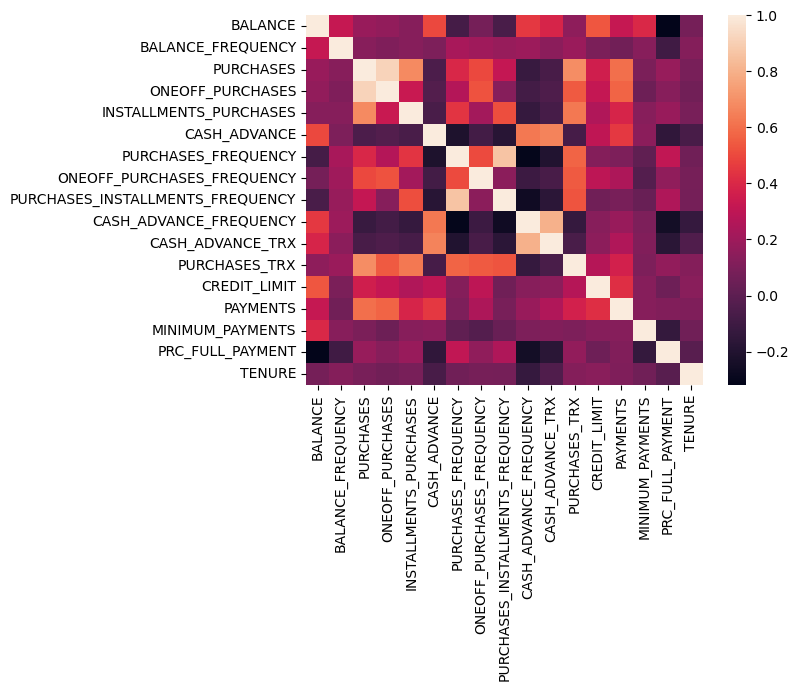

In [9]:
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:xlabel='PURCHASES'>

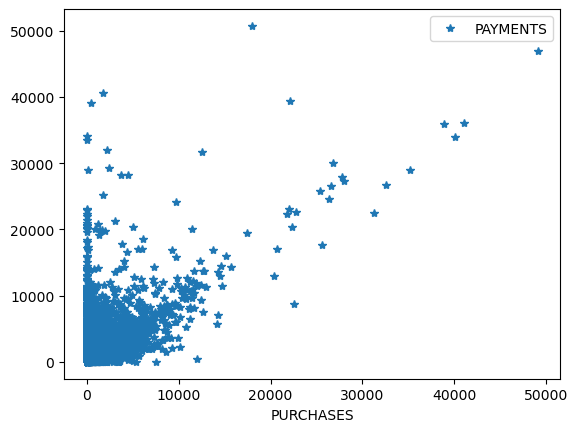

In [10]:
dataset.plot(x='PURCHASES', y='PAYMENTS', style='*')

In [11]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [12]:
dataset_scaled.shape

(8950, 17)

In [13]:
dataset_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

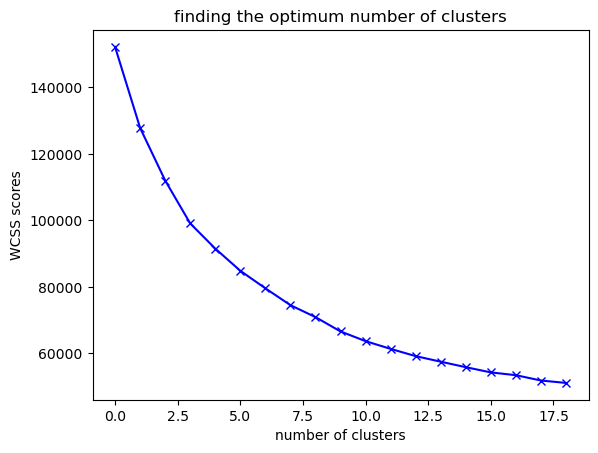

In [15]:
wcss = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dataset_scaled)
    wcss.append(kmeans.inertia_)


    
plt.plot(wcss, 'bx-')
plt.title("finding the optimum number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS scores")
plt.show()

In [16]:
kmeans = KMeans(8)
kmeans.fit(dataset_scaled)
labels = kmeans.labels_

In [17]:
kmeans.cluster_centers_.shape

(8, 17)

In [18]:
cluster_centers_dataset = pd.DataFrame(data = kmeans.cluster_centers_, columns=[dataset.columns])
cluster_centers_dataset


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364387,0.333522,-0.036963,-0.244149,0.360956,-0.363619,0.991355,-0.386657,1.206719,-0.475345,-0.361168,0.188172,-0.259097,-0.215973,-0.025829,0.314266,0.257586
1,1.698121,0.393243,-0.215758,-0.154764,-0.225898,2.024398,-0.472324,-0.211044,-0.409751,1.919756,1.940326,-0.263497,1.039480,0.827143,0.562831,-0.392485,0.071677
2,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567769,-0.392680,-0.215888,0.014011,-3.203733
3,0.018583,0.403195,-0.361805,-0.247002,-0.401586,-0.087213,-0.866719,-0.410509,-0.757807,0.114883,-0.021351,-0.486589,-0.305671,-0.248402,-0.005008,-0.456499,0.271833
4,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238981,1.290295,0.448393,0.304778,0.334182
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
6,-0.165602,0.392081,0.453574,0.593763,-0.018531,-0.333793,0.943763,1.879929,0.088400,-0.407420,-0.323238,0.523759,0.371825,0.085751,-0.157452,0.407198,0.260956
7,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177114,-0.202048,-0.284632,0.281550,0.199199


In [19]:
cluster_centers = scaler.inverse_transform(cluster_centers_dataset)
cluster_centers_dataset = pd.DataFrame(data=cluster_centers, columns=[dataset.columns])
cluster_centers_dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,806.034585,0.956279,924.232605,187.200476,737.475444,216.344258,0.888229,0.087111,0.844018,0.040023,0.784119,19.387097,3551.573301,1107.923060,784.655418,0.245632,11.862035
1,5098.970857,0.970426,542.233972,335.560720,206.791336,5224.127785,0.300784,0.139499,0.201592,0.519307,16.490128,8.160279,8276.369971,4127.642114,2157.800185,0.038919,11.613240
2,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2428.488746,596.373827,341.313370,0.157813,7.229904
3,1603.153806,0.972784,230.202228,182.465200,47.918635,795.980745,0.142494,0.079995,0.063265,0.158133,3.103119,2.615046,3382.116208,1014.043890,833.224813,0.020196,11.881101
4,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1890.855670,0.242857,11.964539
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,1219.788267,0.970151,1972.272852,1577.962477,394.310375,278.892154,0.869128,0.763277,0.399570,0.053615,1.042962,27.728519,5847.145588,1981.383343,477.624005,0.272813,11.866545
7,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,180.957634,0.236063,11.783898


In [26]:
labels.shape

(8950,)

In [27]:
labels.max()

7

In [28]:
y_kmeans = kmeans.fit_predict(dataset_scaled)
y_kmeans

array([0, 2, 1, ..., 7, 7, 7])

In [30]:
dataset_clusters = pd.concat([dataset, pd.DataFrame({'cluster': labels})], axis=1)
dataset_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


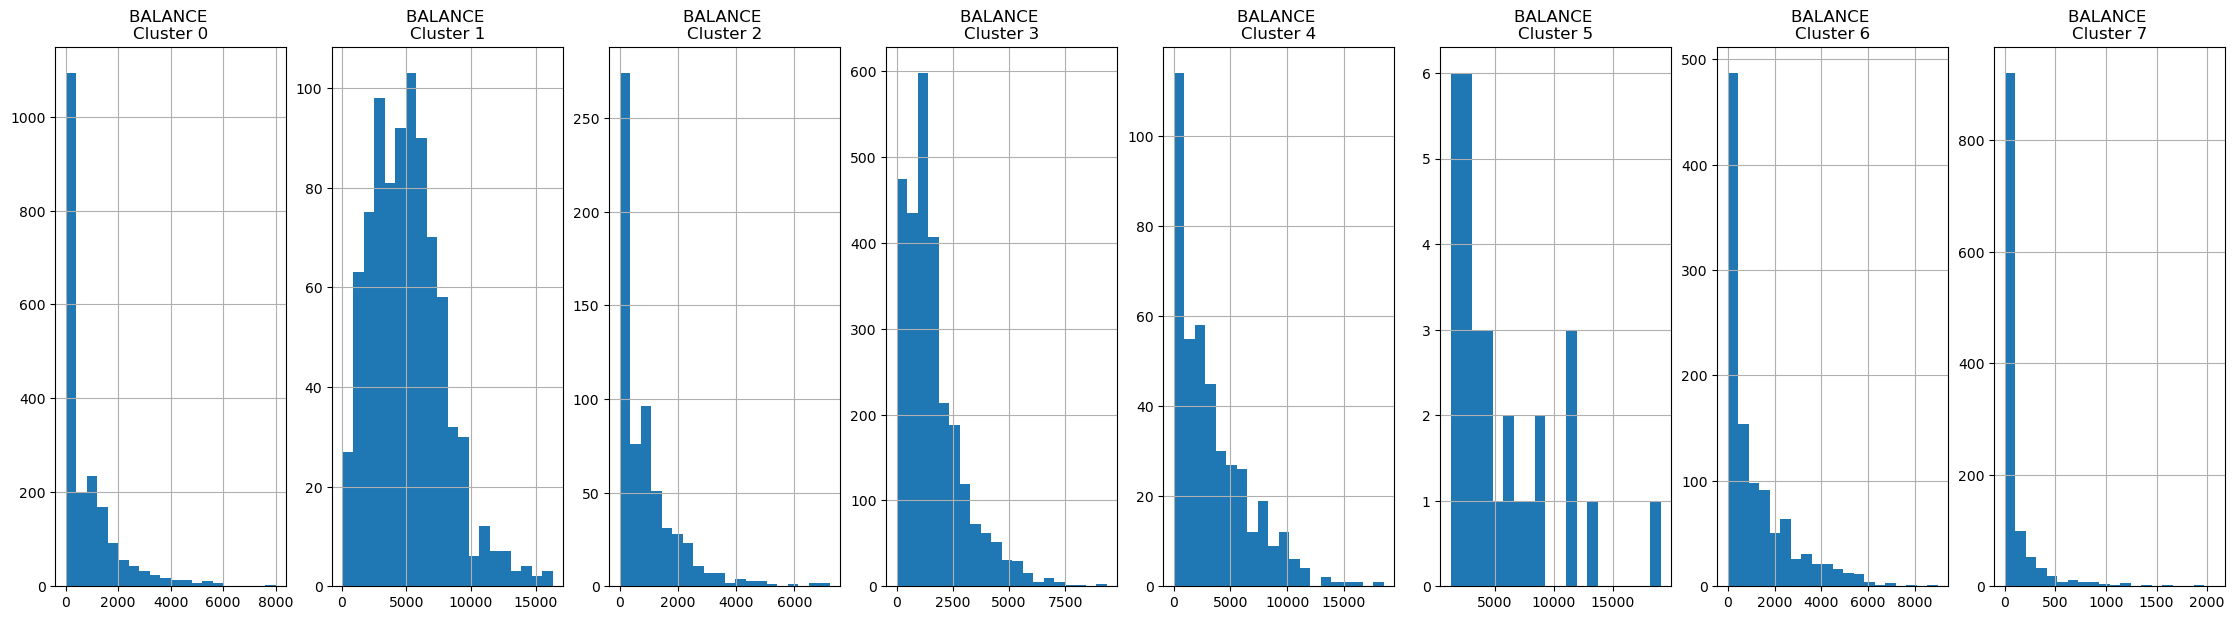

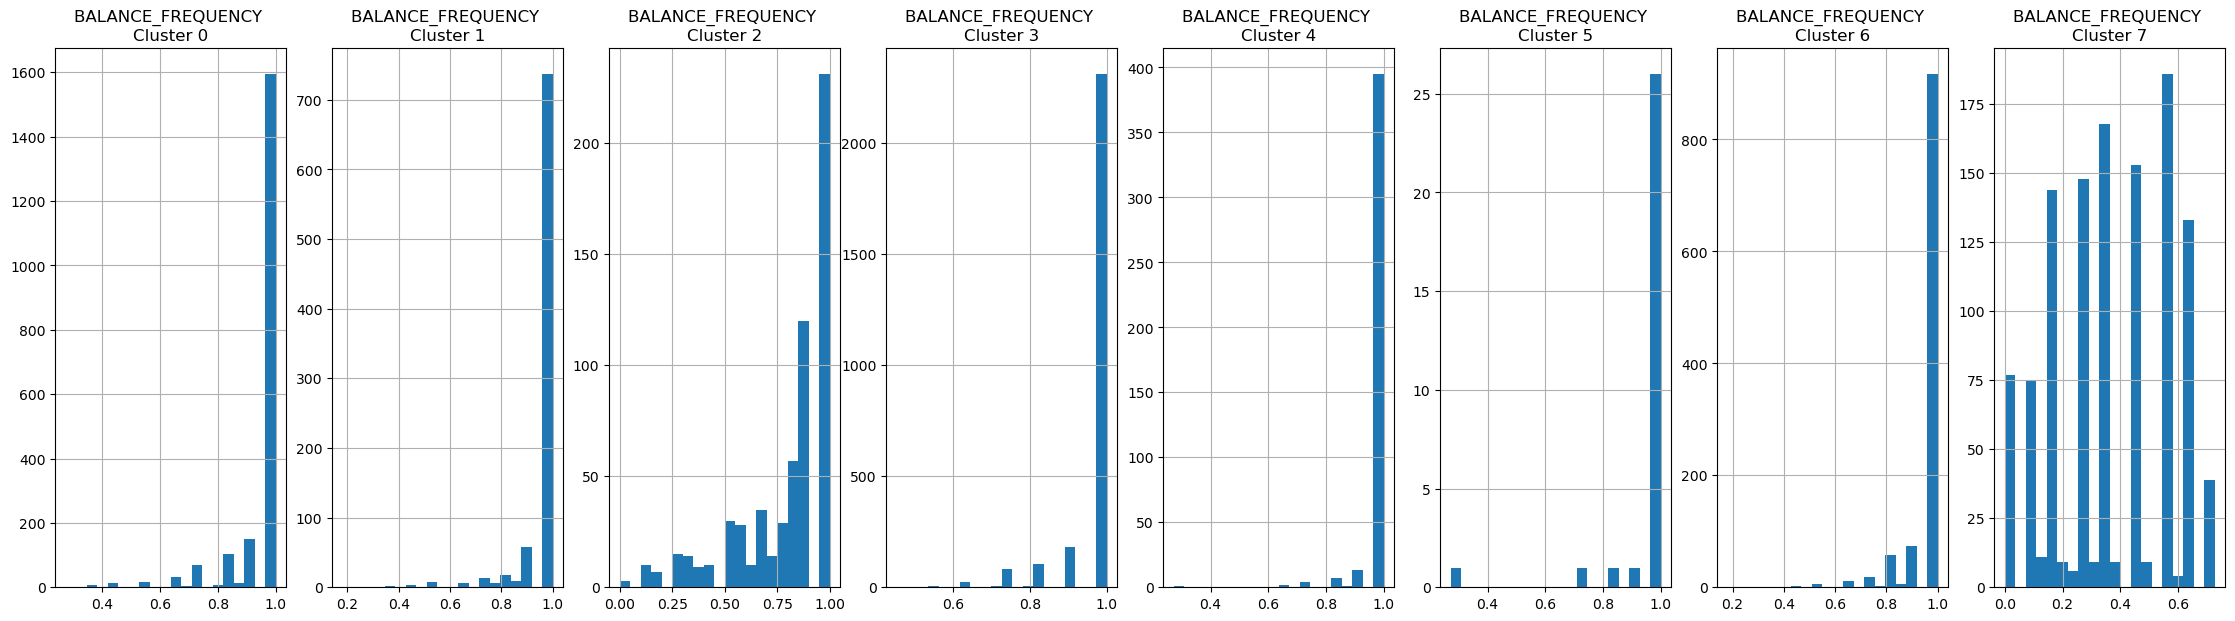

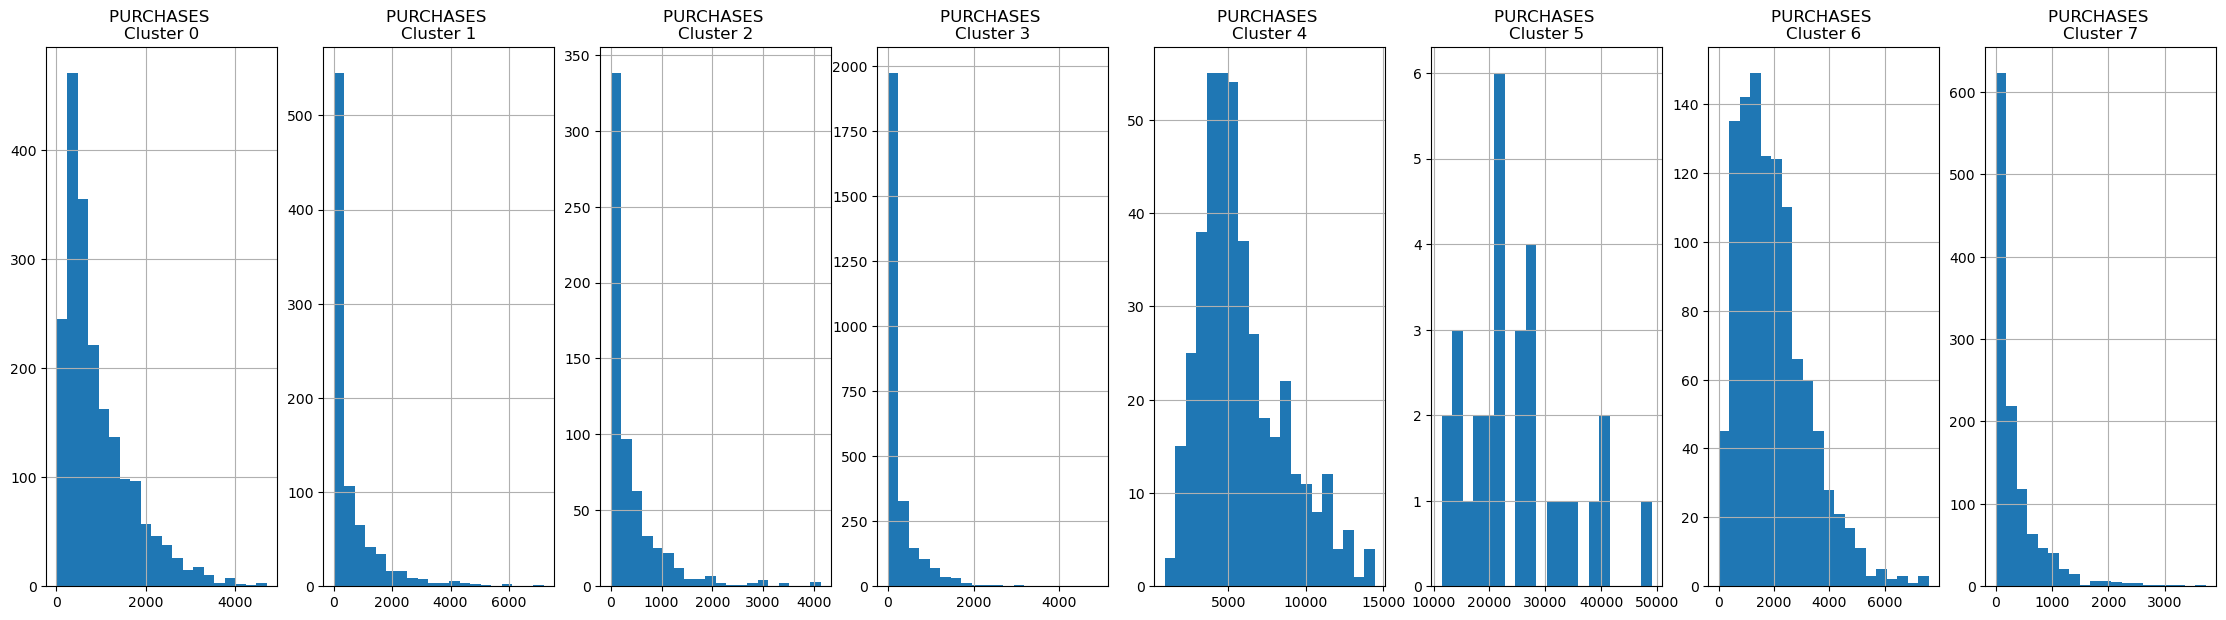

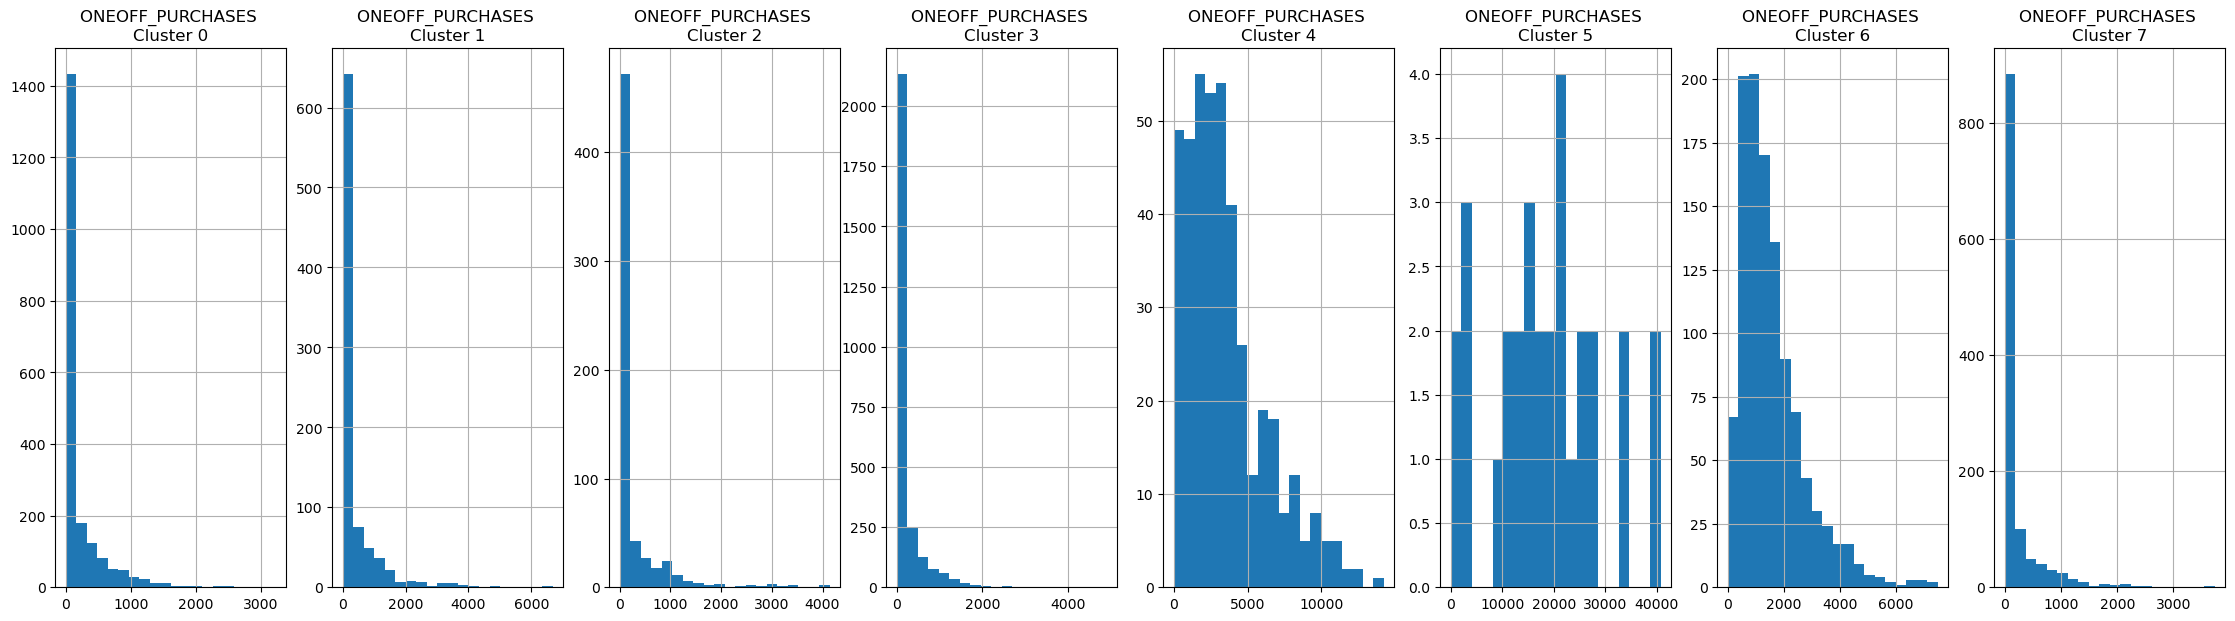

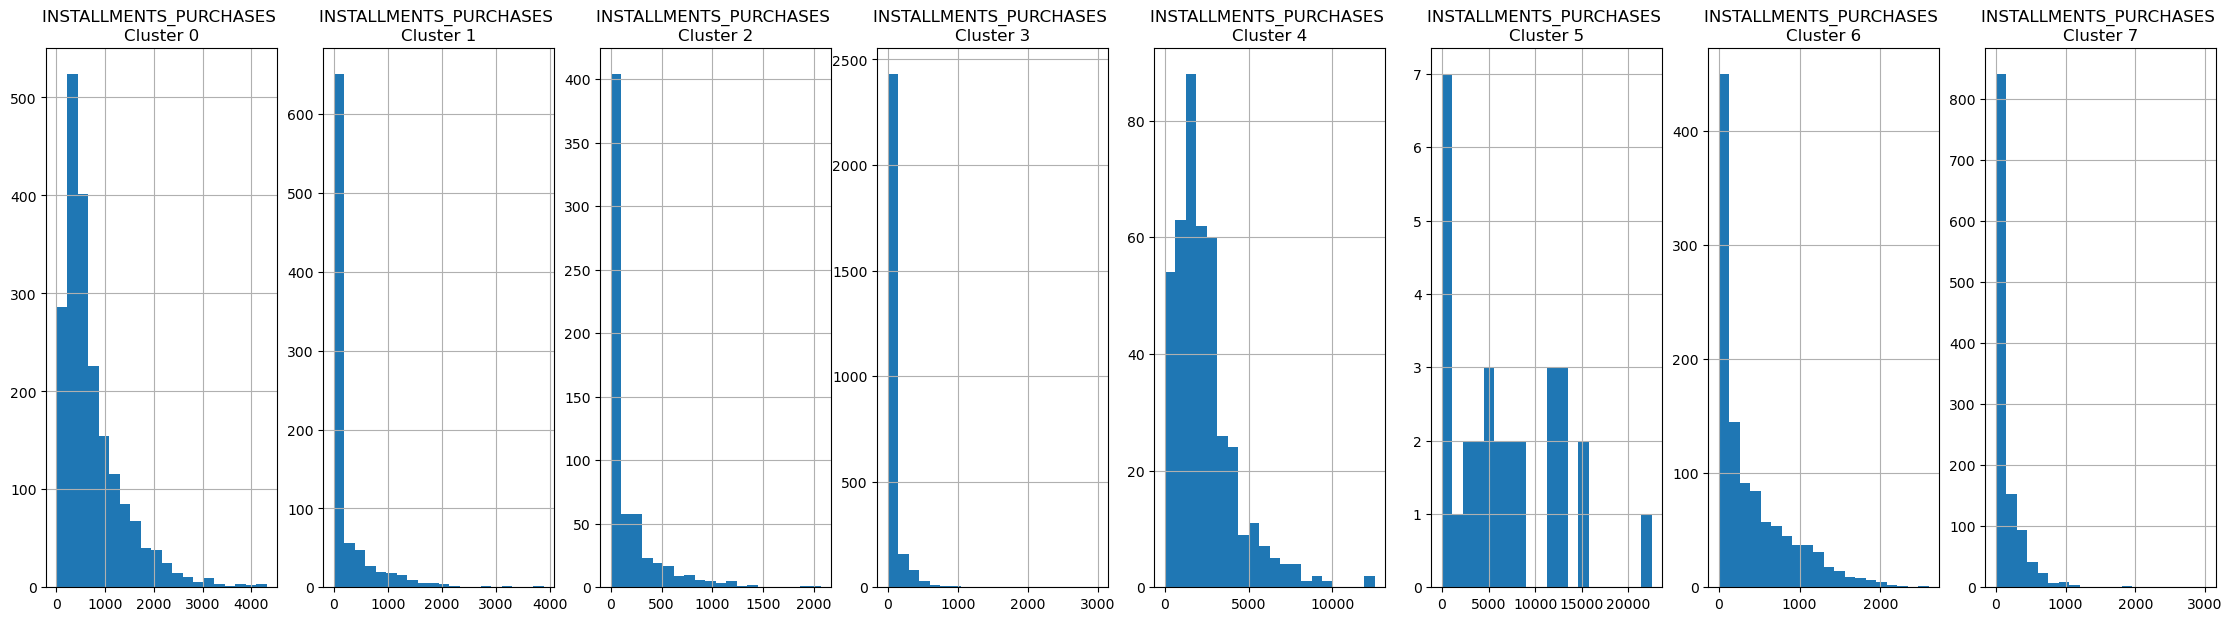

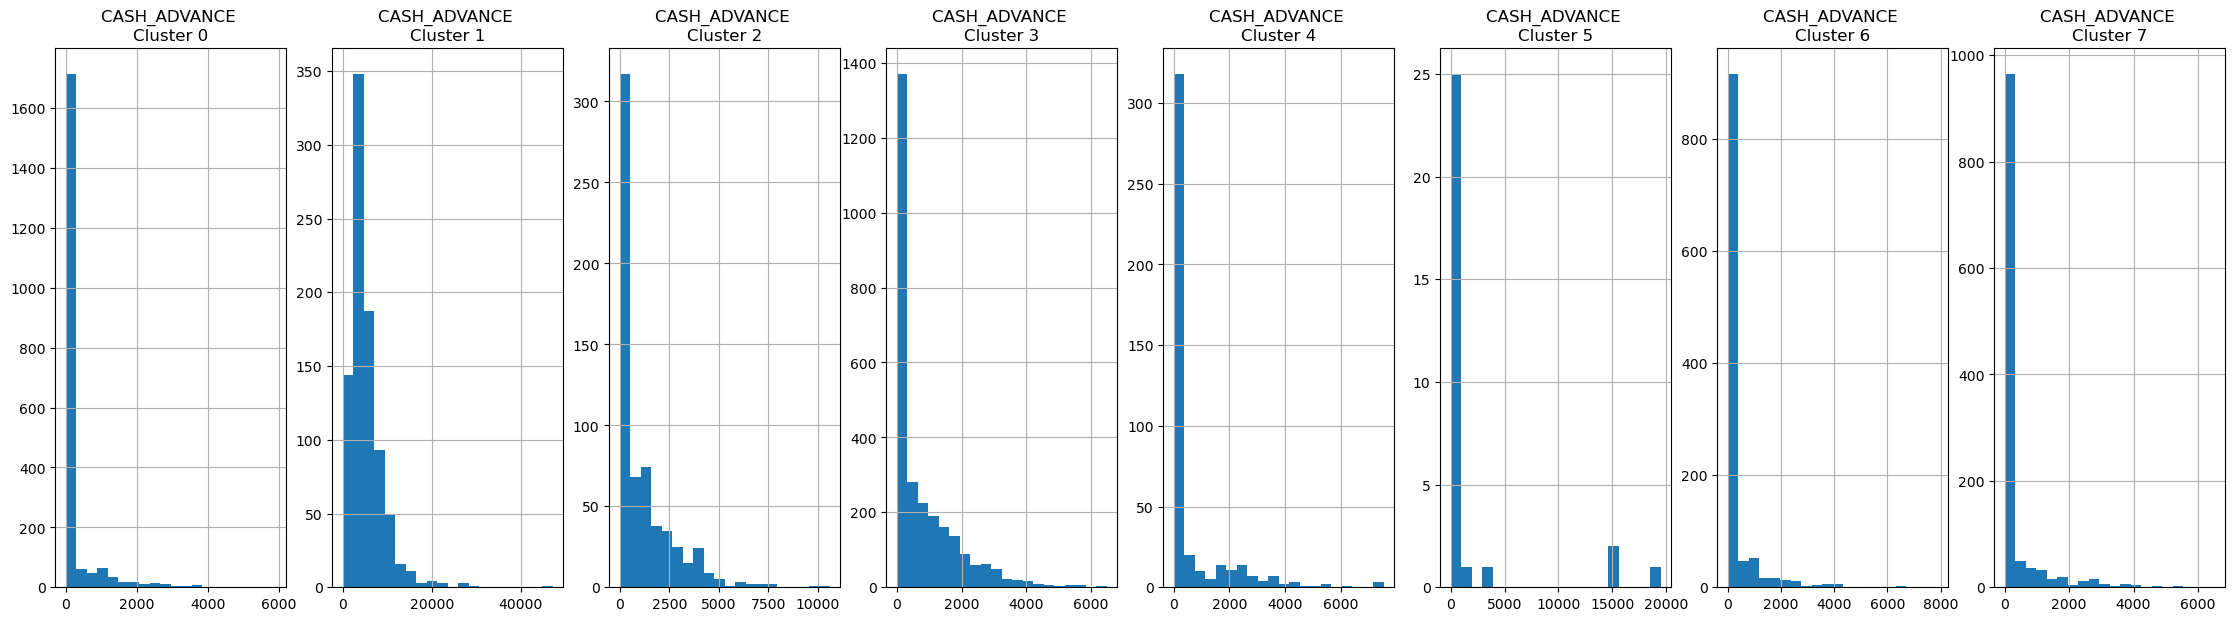

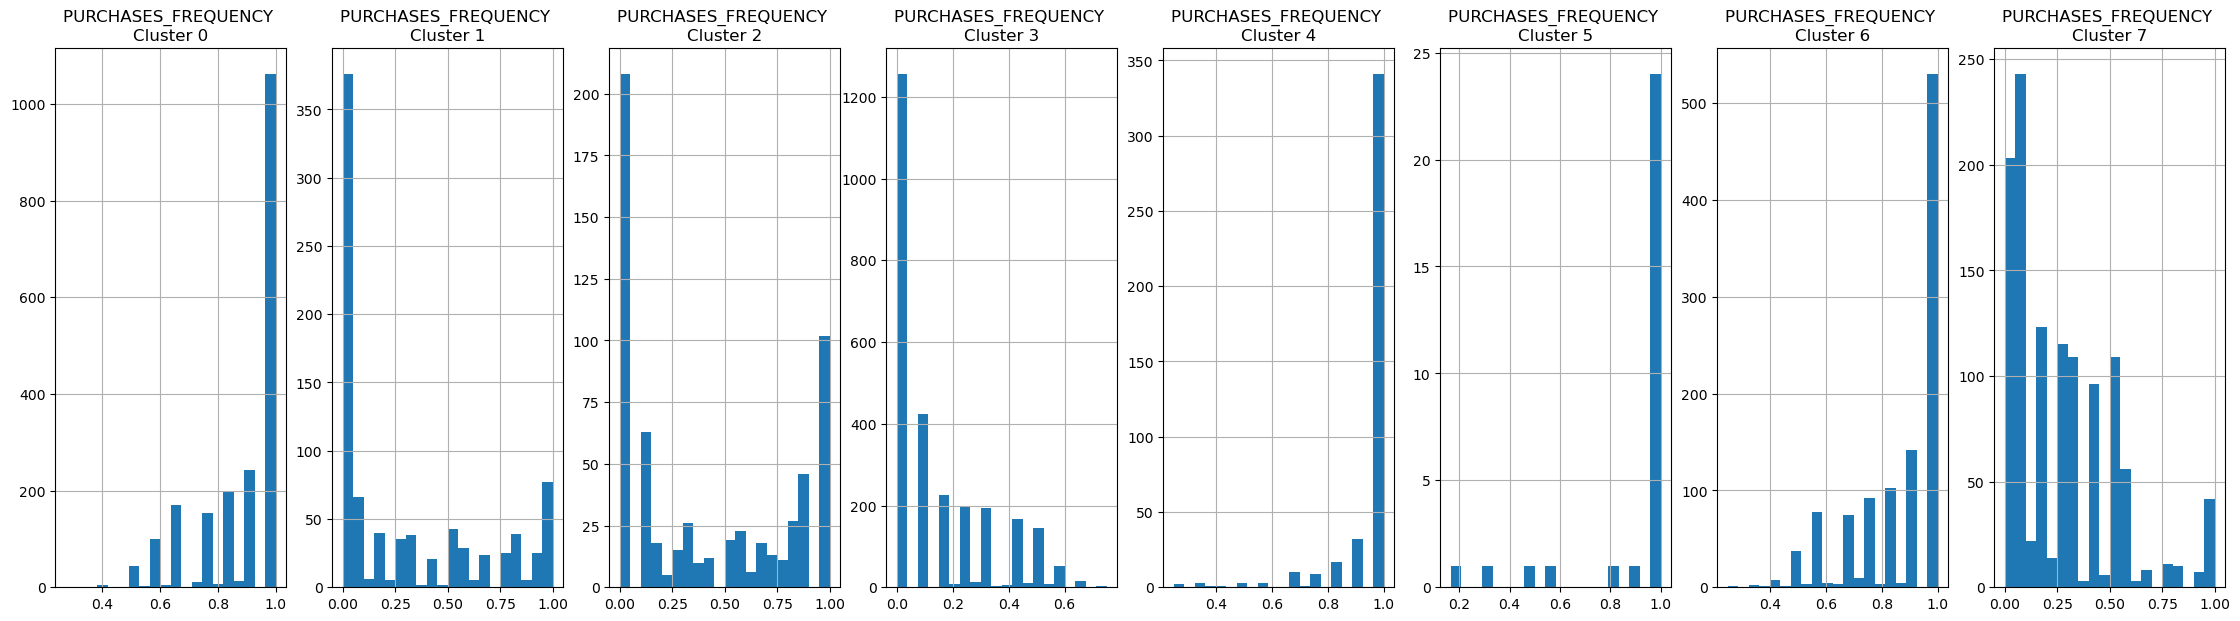

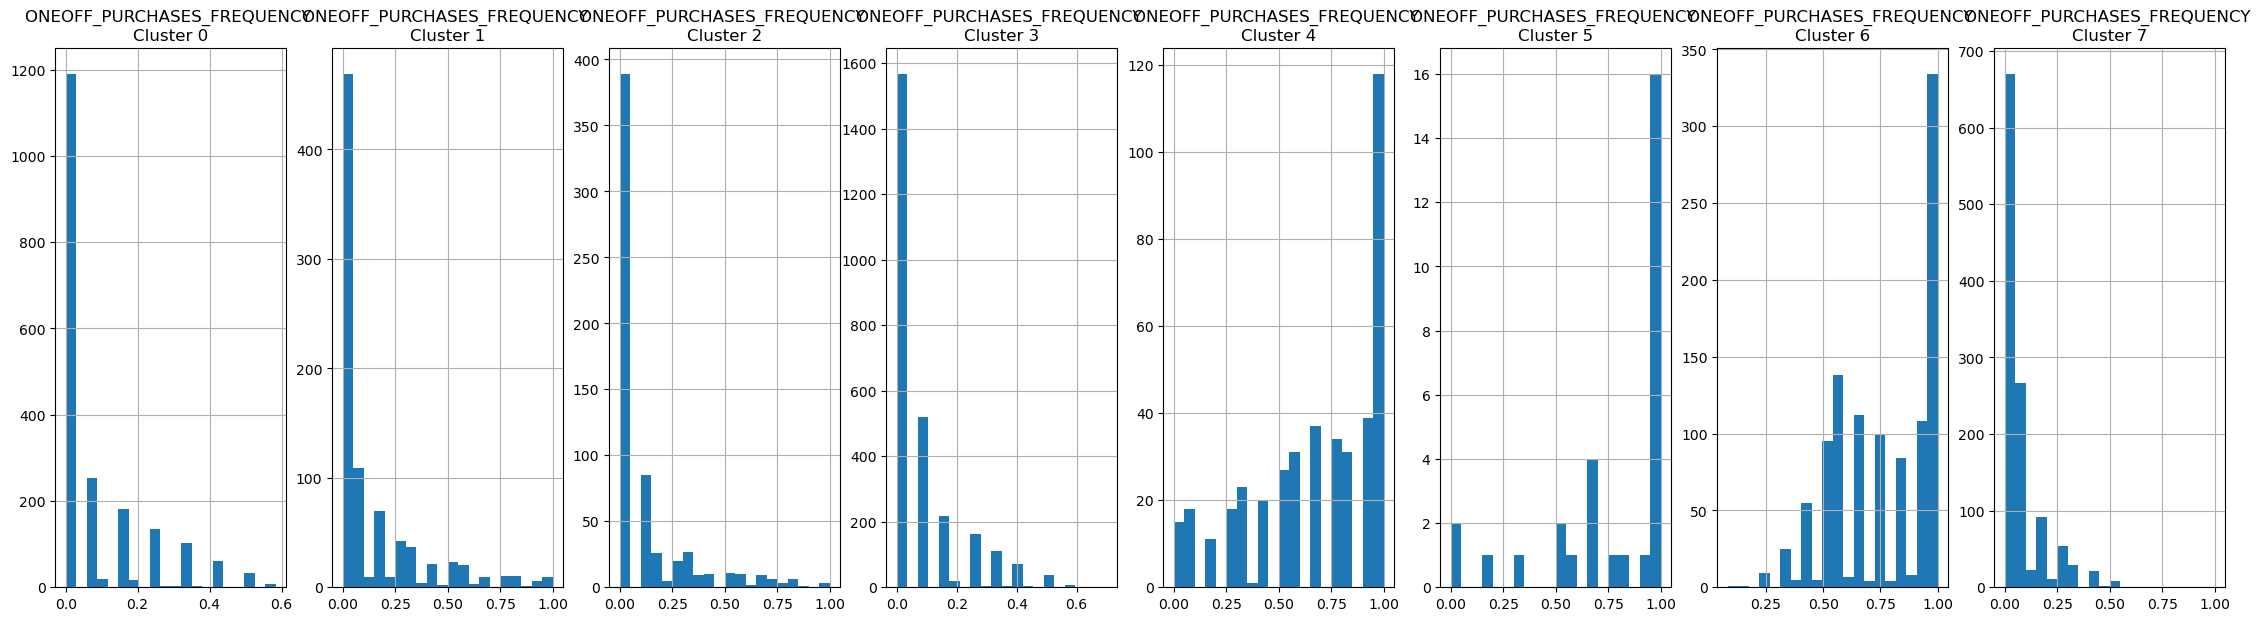

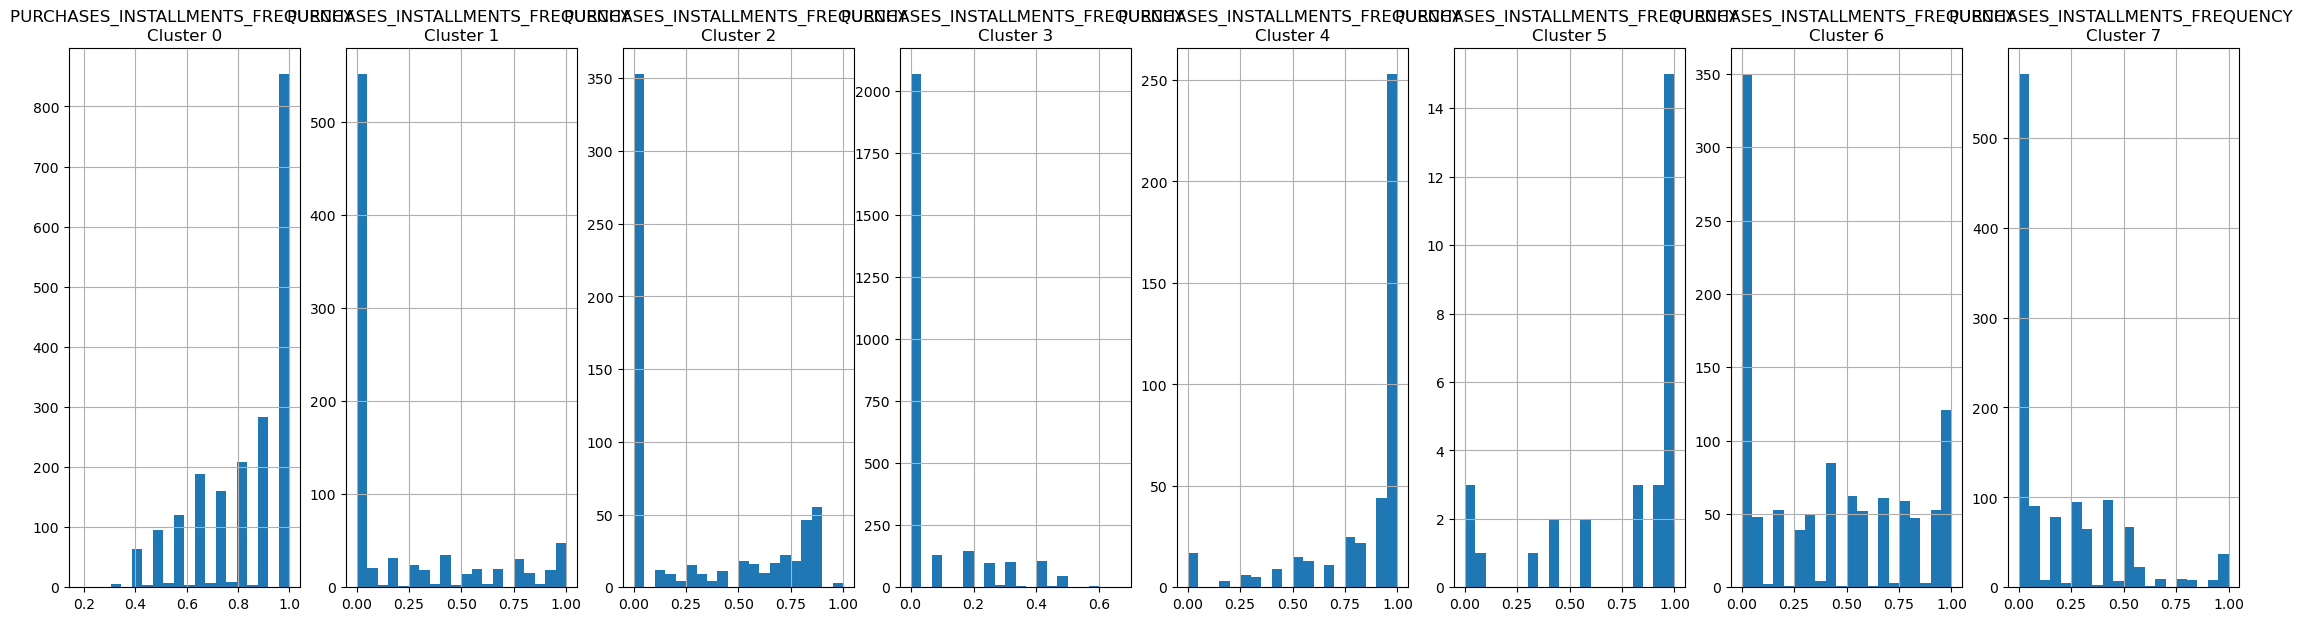

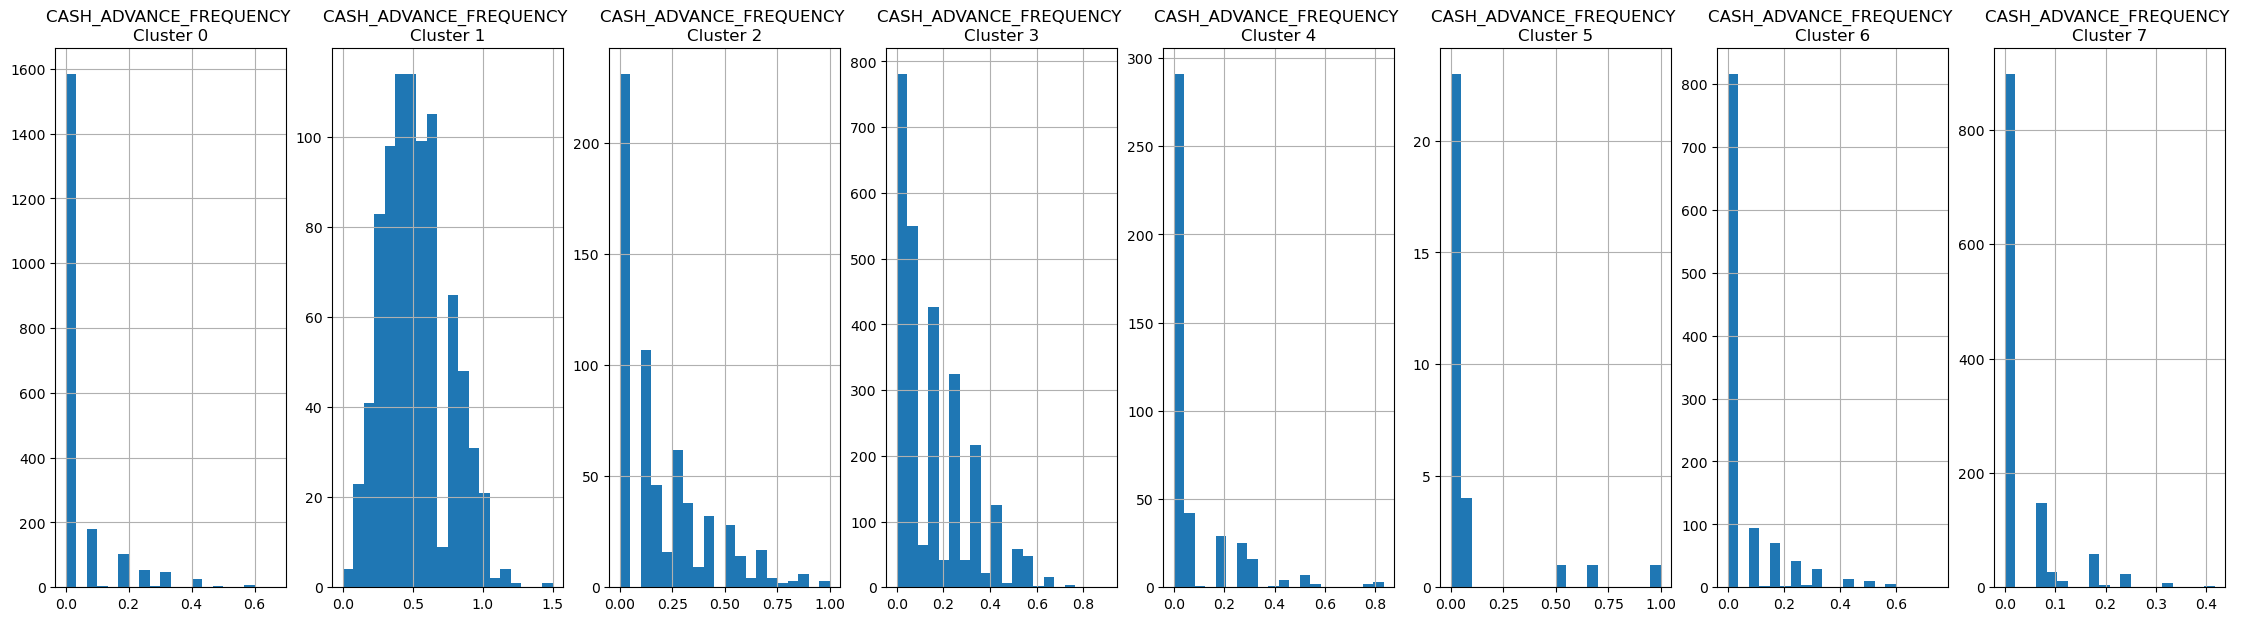

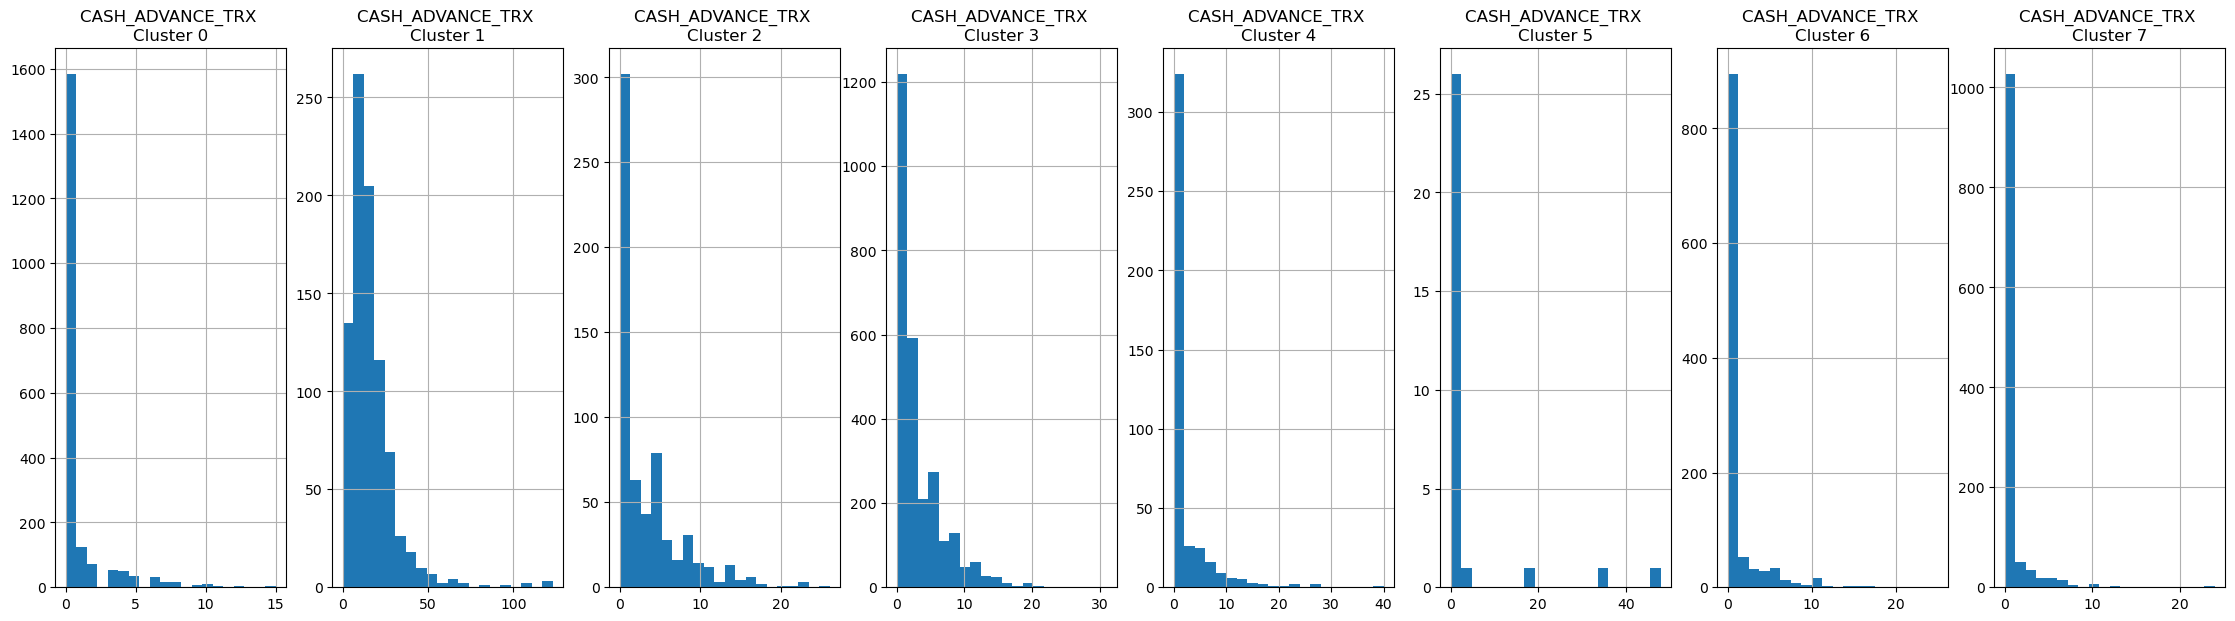

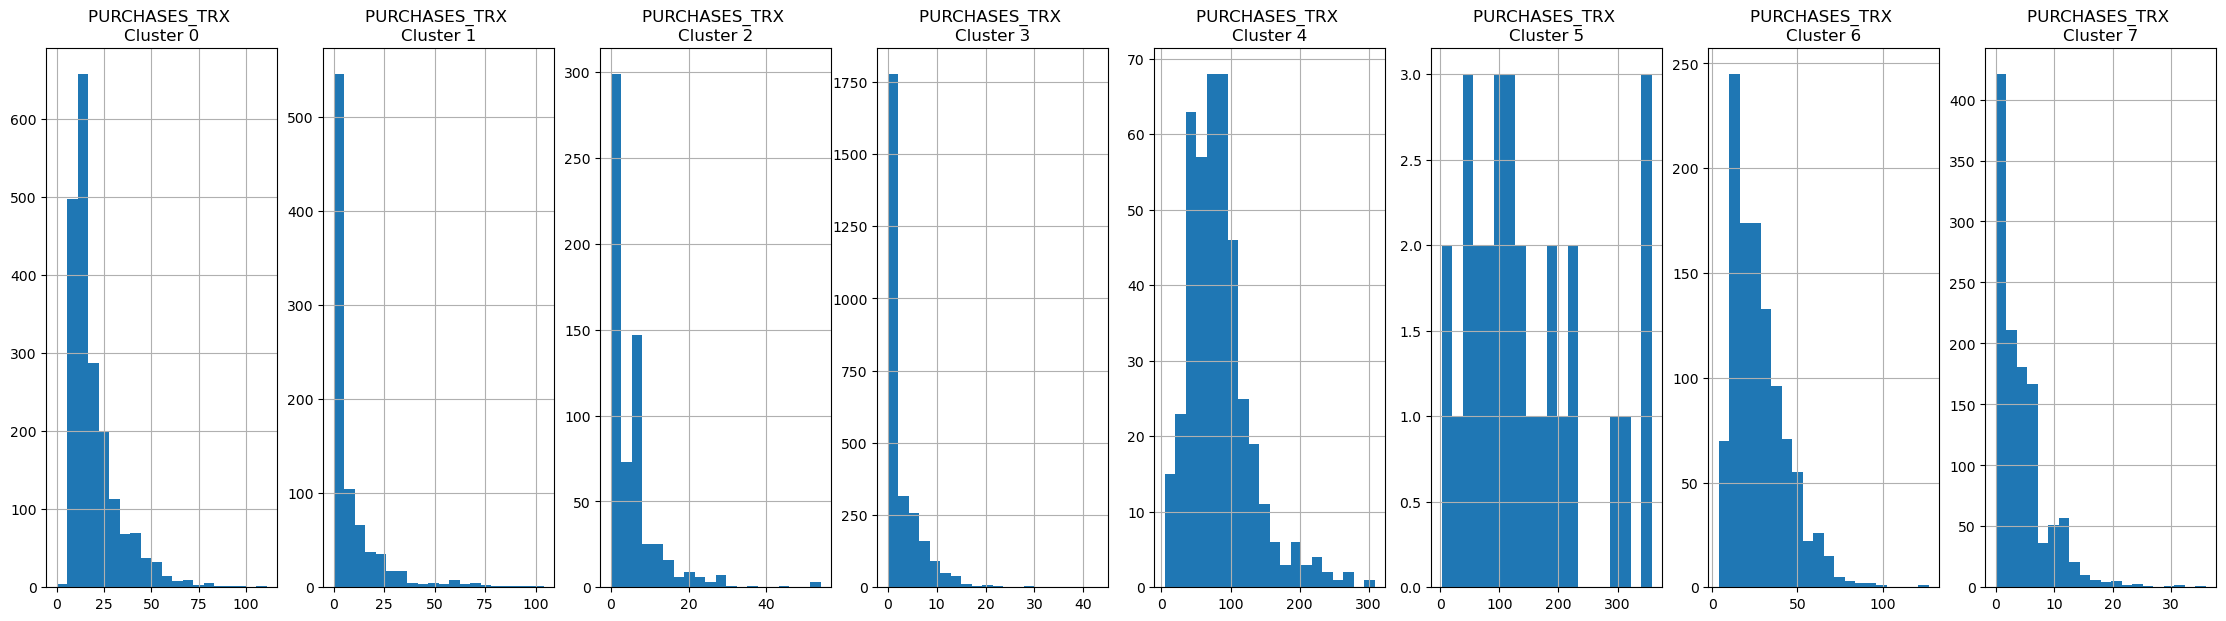

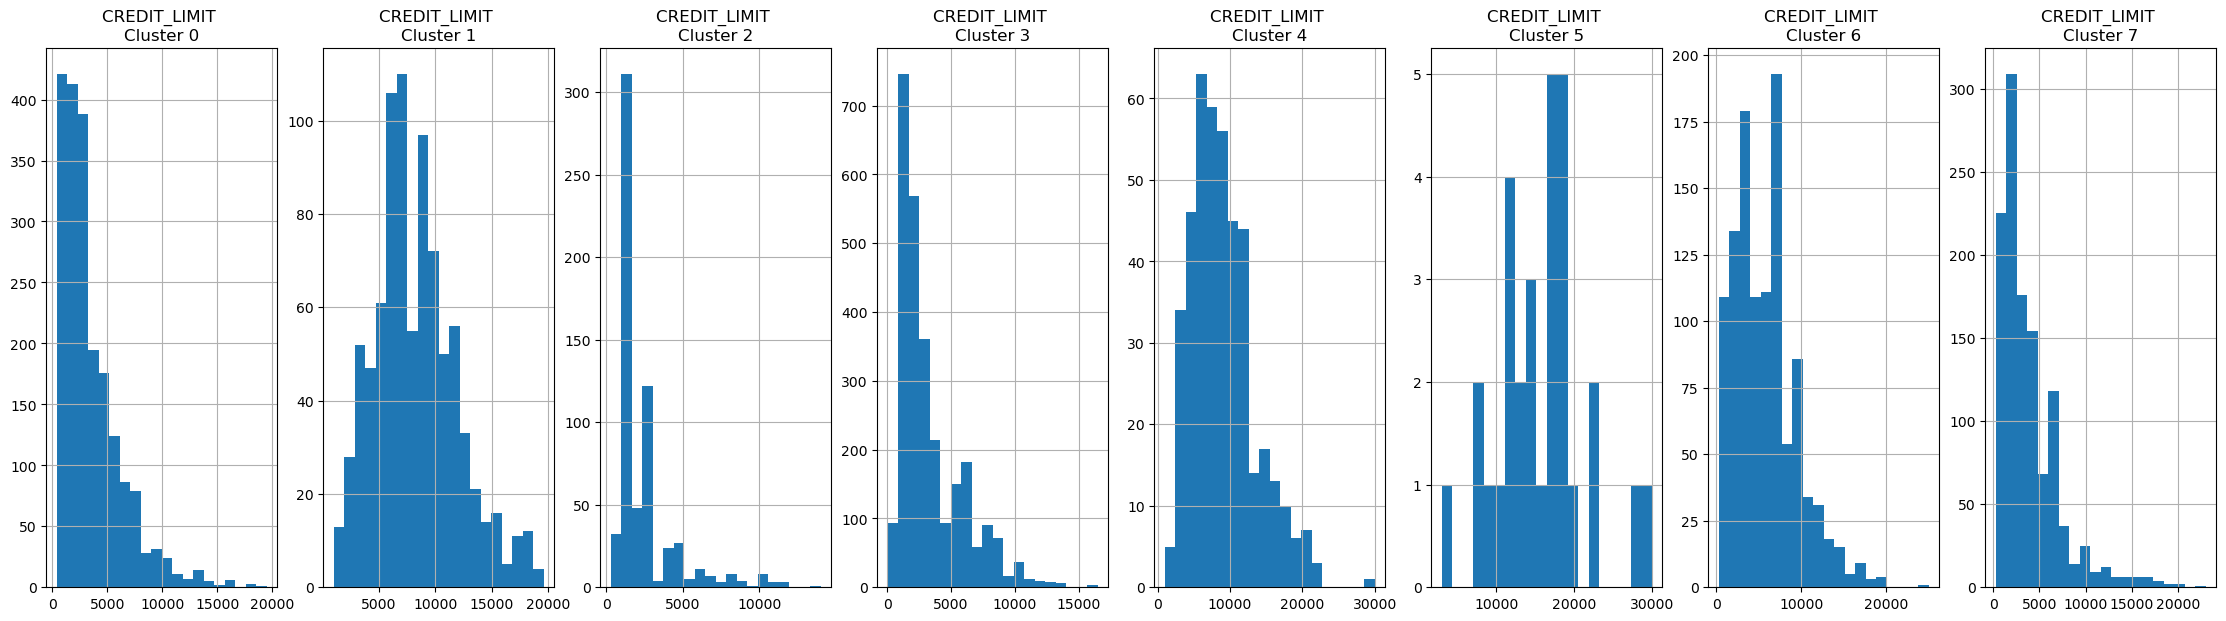

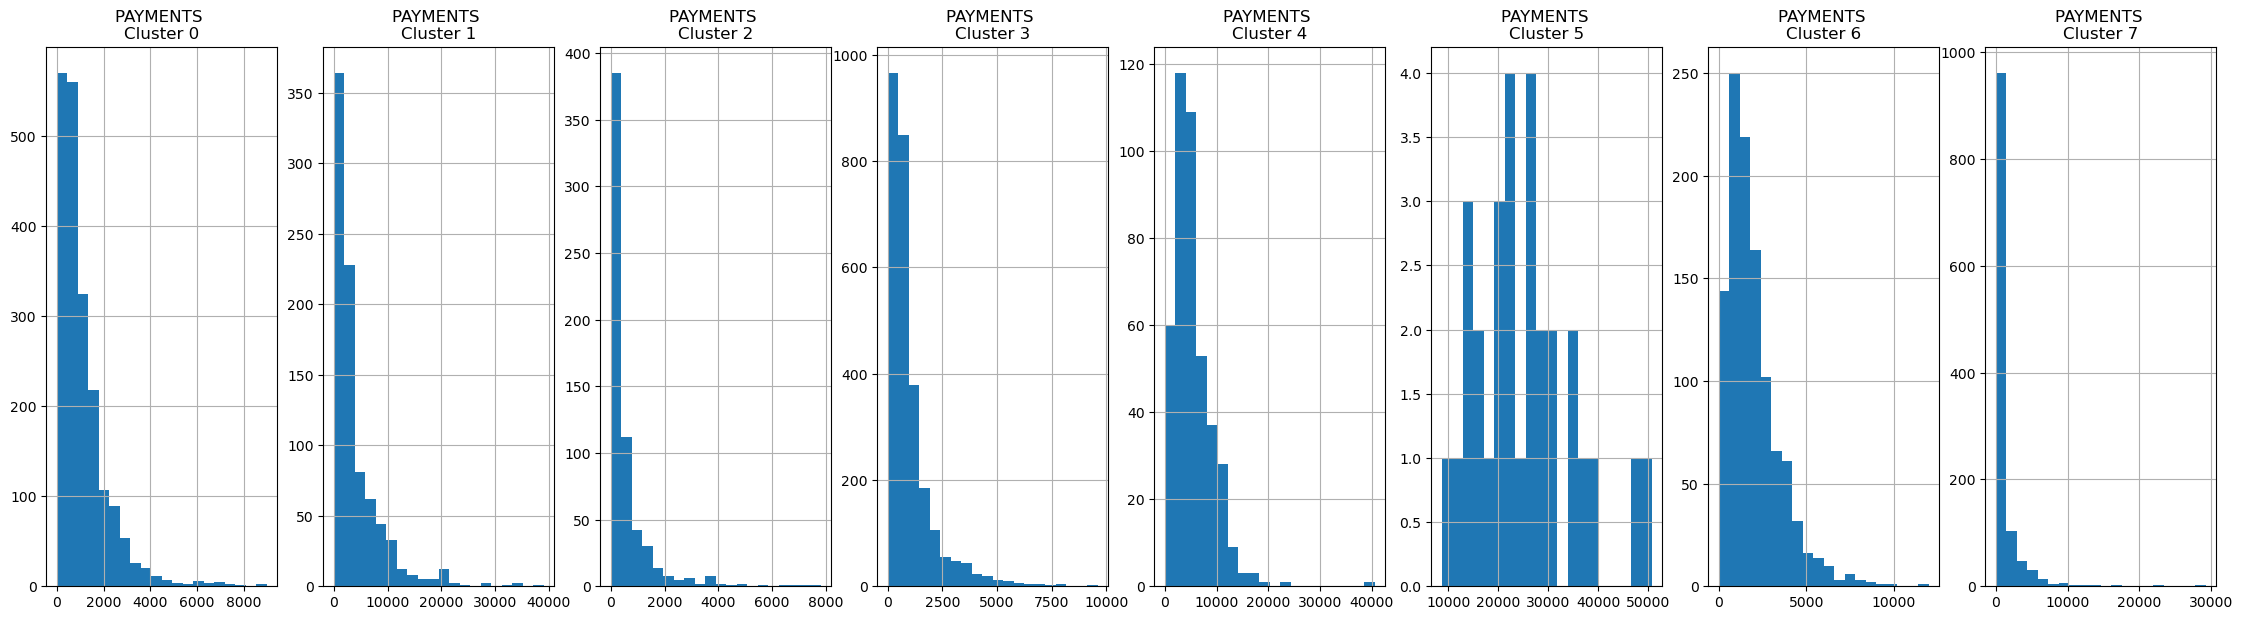

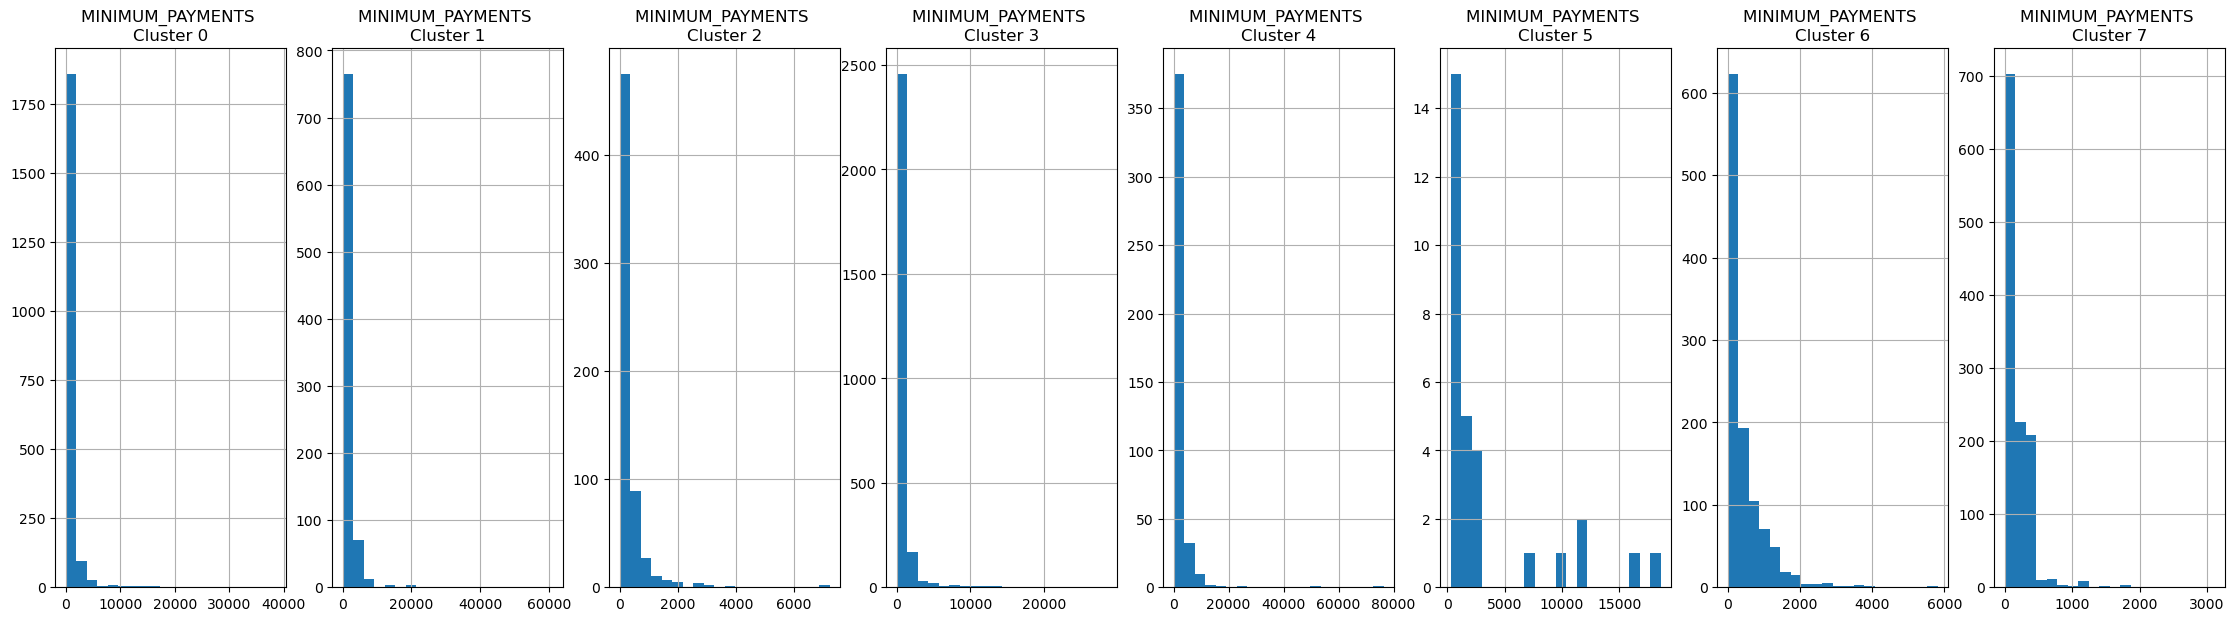

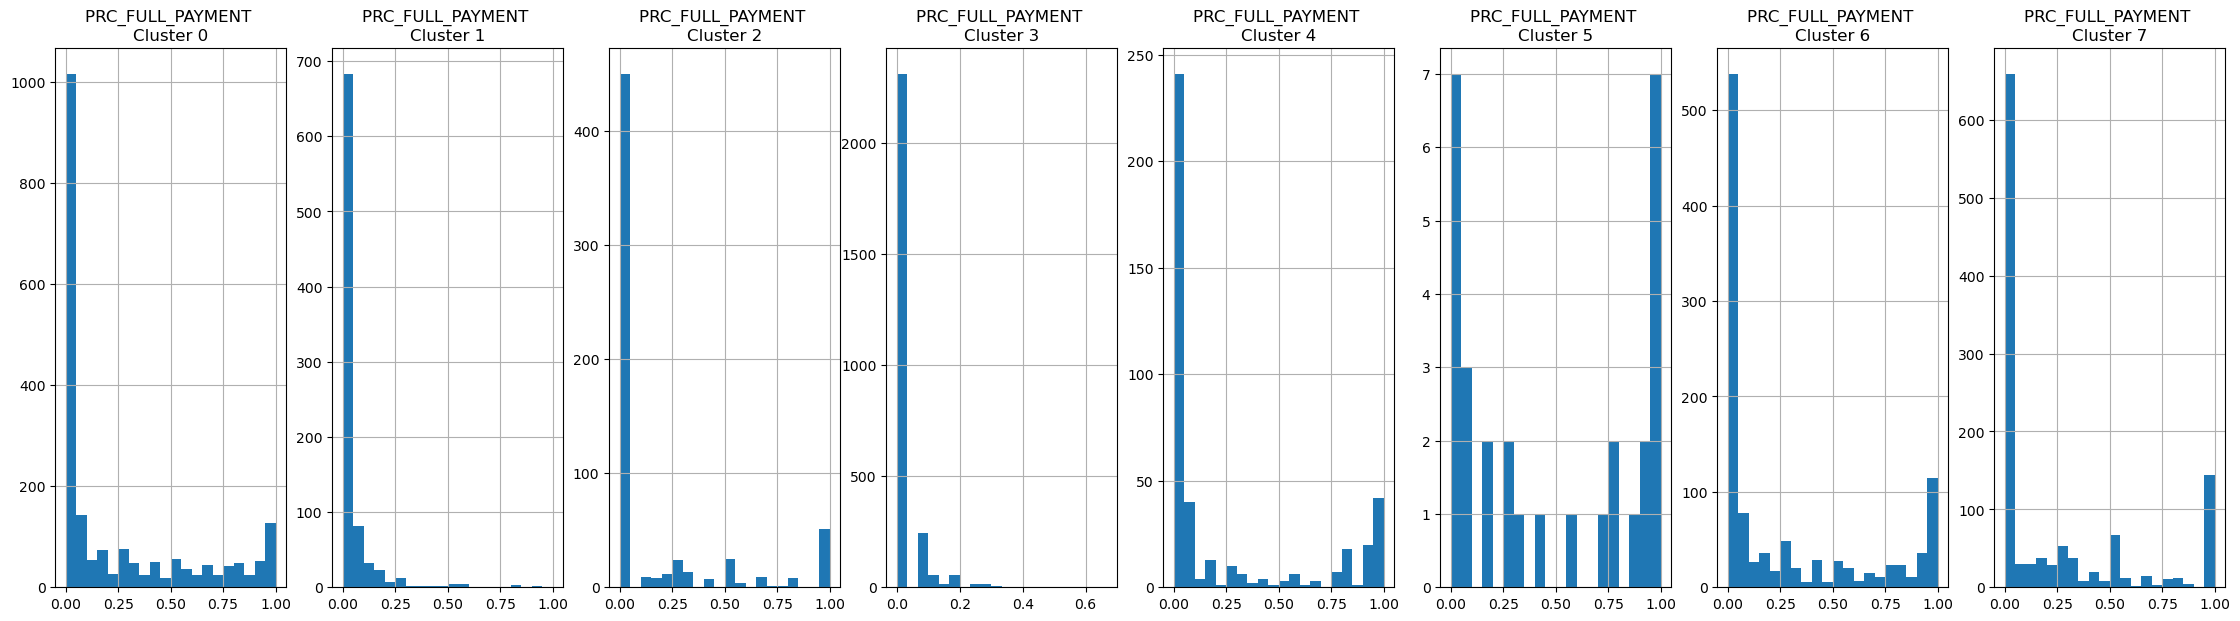

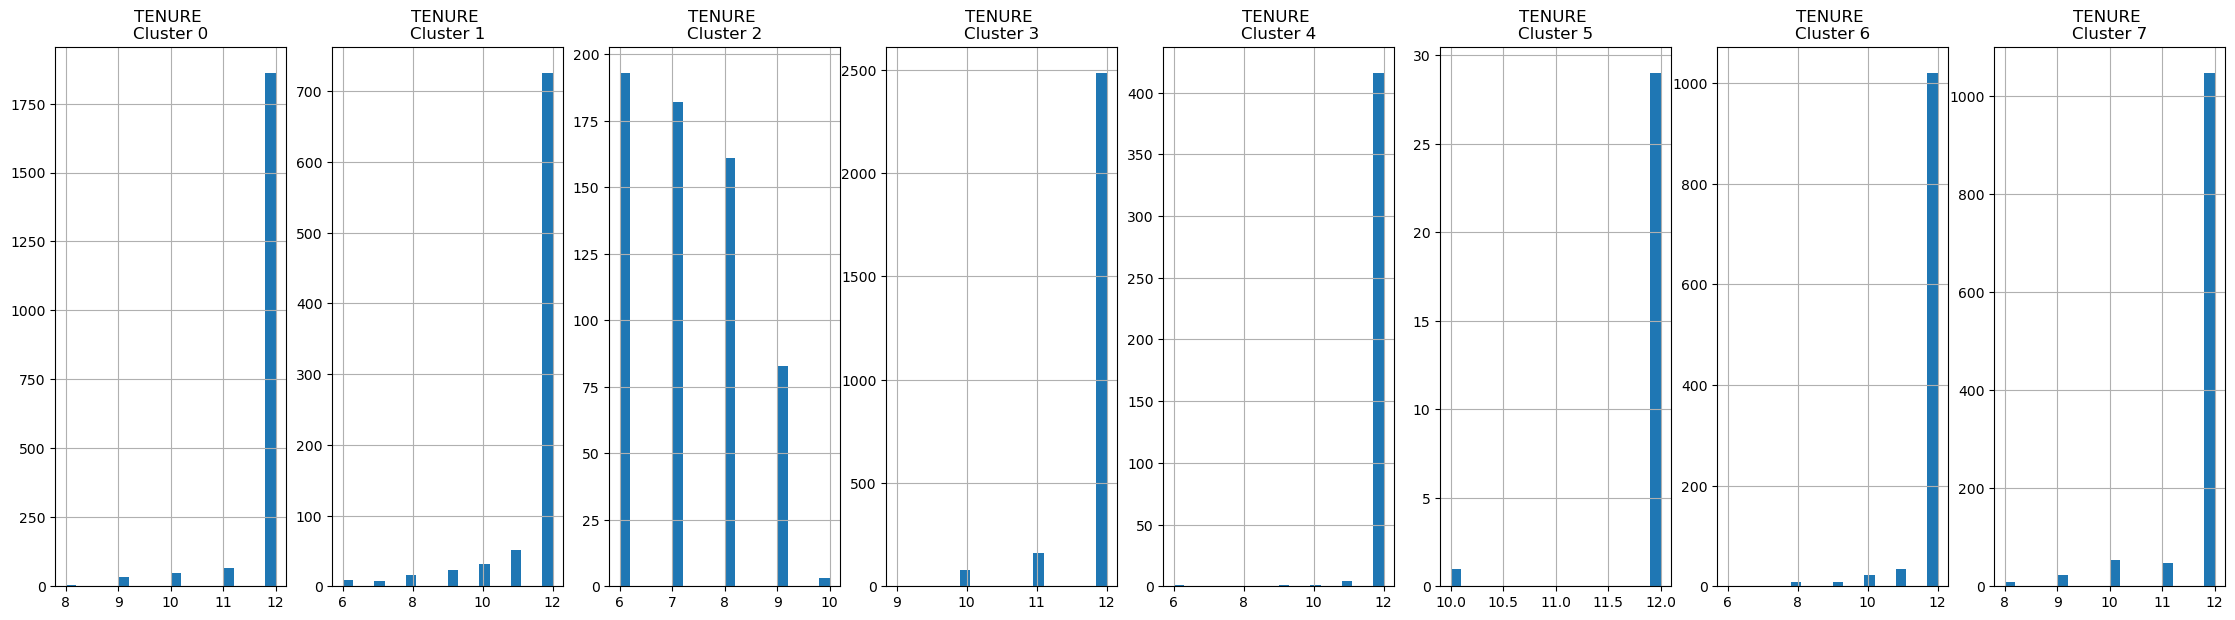

In [31]:
for col in dataset.columns:
  plt.figure(figsize=(28, 7))
  for i in range(8): # number of clusters
    plt.subplot(1, 8, i+1)
    cluster = dataset_clusters[dataset_clusters['cluster'] == i]
    cluster[col].hist(bins=20)
    plt.title(f"{col} \nCluster {i}")

plt.show()

In [36]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(dataset_scaled)
principal_comp_dataset = pd.DataFrame(principal_comp, columns=['principal_component_1', 'principal_component_2'])
principal_comp_dataset.head()

,principal_component_1,principal_component_2
0,-1.683649,-1.072242
1,-1.134087,2.509152
2,0.969395,-0.383581
3,-0.888221,0.004649
4,-1.600021,-0.683796


In [38]:
pc_dataset_clusters = pd.concat([principal_comp_dataset, pd.DataFrame({'cluster': labels})], axis=1)
pc_dataset_clusters.head()

,principal_component_1,principal_component_2,cluster
0,-1.683649,-1.072242,3
1,-1.134087,2.509152,1
2,0.969395,-0.383581,6
3,-0.888221,0.004649,3
4,-1.600021,-0.683796,3


[Text(0.5, 0, 'Principal Component 1'), Text(0, 0.5, 'Principal Component 2')]

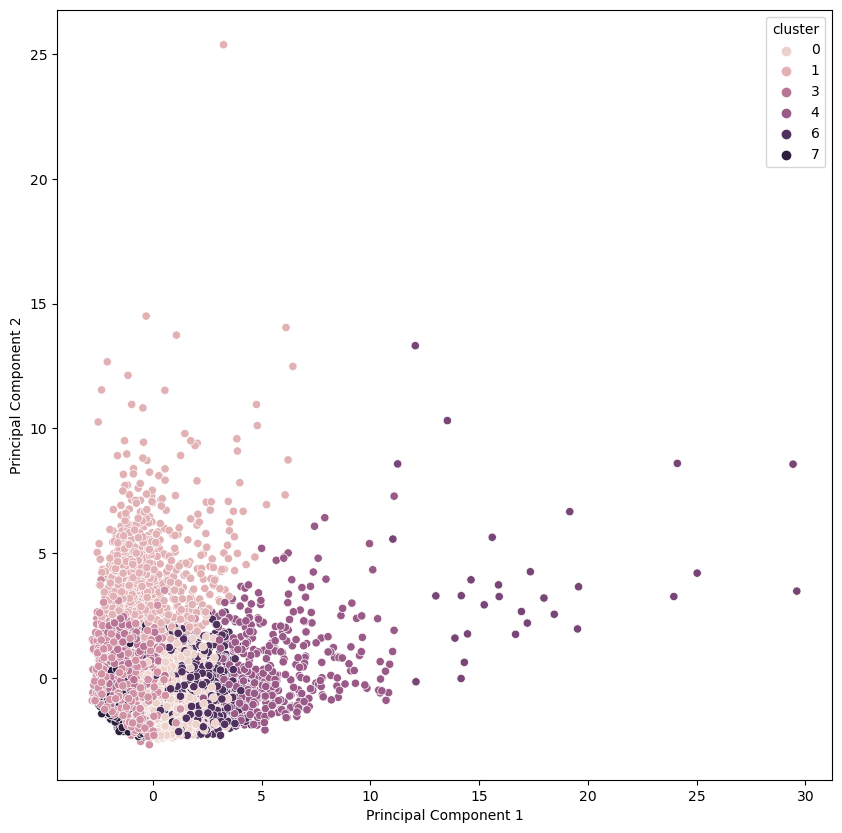

In [39]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=pc_dataset_clusters, hue='cluster', x='principal_component_1', y='principal_component_2')
ax.set(xlabel="Principal Component 1", ylabel="Principal Component 2")